In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle


# Pre-proccesing

In [13]:
df = pd.read_csv('perceptron_dataset.csv')
#min_max_scaler = preprocessing.MinMaxScaler() normalizace nepoužívat je to pak moc rychlé :D
#arr_df = min_max_scaler.fit_transform(df)
arr_df = np.array(df)
headers = ['Temperature','light','CO2','Occupancy']

In [14]:
arr_X = np.delete(arr_df,-1,-1)
arr_Y = arr_df[:,-1]

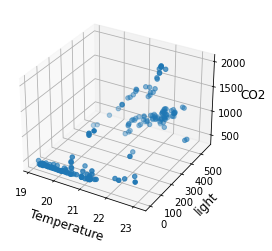

In [15]:
x,y,z = arr_X[:,0],arr_X[:,1],arr_X[:,-1]
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,cmap='inferno')
ax.set_xlabel(headers[0],fontsize=12)
ax.set_ylabel(headers[1],fontsize=12)
ax.set_zlabel(headers[2],fontsize=12)
plt.show()

# Perceptron

In [16]:
x_train, x_test, y_train, y_test = train_test_split(arr_X, arr_Y)
N_ep = 1500
wei = np.array([0,0,0,0])
b = 1
c = 10

In [17]:
def ACT_fx(arr_xi,wei,b,row):
    ACT_res = (wei[0]*b) + np.sum(wei[1:]*arr_xi[row])
    return ACT_res

def ACT_wei(Ep_score,c,arr_xi,wei,row):
    wei = wei + (c *(Ep_score)*np.insert(arr_xi[row],0,1))
    return wei

def Perceptron(arr_xi,wei,arr_yi):
    Ep_scRS = [ ]
    weiRS = [ ]
    
    for epoch in range(N_ep):
        k = 0
        arr_xi, arr_yi = shuffle(arr_xi,arr_yi)
        
        for row in range(len(arr_xi)):
            ACT_res = ACT_fx(arr_xi,wei,b,row)
            ACT_res = np.where(ACT_res>=0,1,0)
            Ep_score = arr_yi[row]-ACT_res
            wei = ACT_wei(Ep_score,c,arr_xi,wei,row)
            
            k += abs(Ep_score) 
        Ep_scRS.append(k)
    weiRS.append(wei) 
        
    return Ep_scRS, weiRS, arr_xi

In [18]:
Ep_score, wie_score, x_data = Perceptron(x_train,wei,y_train)

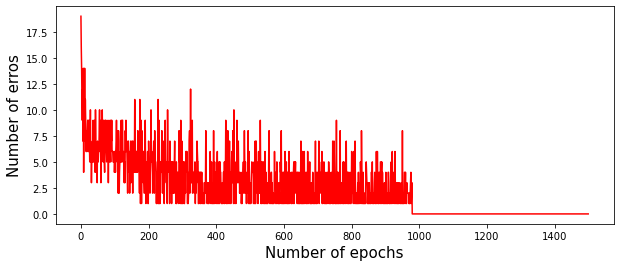

In [19]:
fig = plt.figure(figsize =(10, 4))
plt.plot(Ep_score,color = 'red')
plt.ylabel(ylabel='Number of erros',size = 15)
plt.xlabel(xlabel='Number of epochs',size = 15)
plt.show()

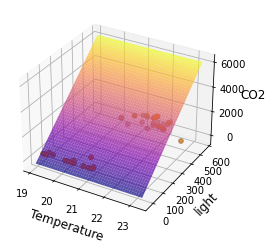

In [20]:
x,y,z = x_data_test[:,0],x_data_test[:,1],x_data_test[:,-1]
ax = plt.axes(projection='3d')
ax.set_xlabel(headers[0],fontsize=12)
ax.set_ylabel(headers[1],fontsize=12)
ax.set_zlabel(headers[2],fontsize=12)
ax.scatter3D(x,y,z,cmap='inferno')
a1,b1,c1,d1 = wie_score_test[0][1],wie_score_test[0][2],wie_score_test[0][3],wie_score_test[0][0]
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x1 = np.linspace(x_min,x_max)
y1 = np.linspace(y_min,y_max)
Xs,Ys = np.meshgrid(x1,y1)
Zs = (d1-a1*Xs-b1*Ys)/c1
ax.scatter3D(x,y,z,cmap='inferno')
ax.plot_surface(Xs,Ys,Zs,alpha = 0.7,cmap='plasma')
plt.show()